## Final Project Submission

Please fill out:
* Student name: 
1. **Anne Mumbe**
  
2. **Davis Chirchir**


4. **Elvis Oduor**

5. **Esterina Kananu**

6. **Kelvin Omina**
* Student pace: Part time
* Scheduled project review date/time: 09/06/2025
* Instructor name: Samuel G. Mwangi
* Blog post URL:


  <h2 align="center"> Effect of Production Budget, Genre,Market and Release Timing on The Revenue Growth of Box Office Movie Business</h2>
  
## Overview
As streaming platforms reshape the entertainment landscape, our company seeks to enter the movie industry by establishing its own production studio. To compete effectively, we must understand the factors that drive box office success. This project focuses on evaluating how genre type, production budget,markets and release timing influence the commercial performance of films.

Using data from TMDb, Box Office Mojo, and other public movie datasets, the analysis aims to uncover patterns that correlate with higher profitability and revenue growth. The findings will guide strategic decisions on what kinds of films to produce and when to release them, offering data-driven recommendations for building a successful movie business.
  ## Business Understanding
This project focuses on providing data-driven insights to a new movie studio to guide our initial strategy and maximize our chances of success in the competitive film industry. The core objective is to identify profitable opportunities and establish a strong foundation for the studio's future.

## The Business Problem

The movie studio faces the significant challenge of entering a mature yet highly dynamic industry. Without an established track record or deep market knowledge, they risk making costly decisions on movie production, target audiences, and release strategies. The primary business problems are:

- High Investment Risk: Film production requires substantial capital, and a single unsuccessful film can severely impact a new studio's viability.
- Lack of Market Insight: Identifying what makes a movie financially successful (e.g., genre, budget, runtime, critical reception, audience popularity) is complex.
- Strategic Decision-Making: We need a clear, data-backed strategy for:
   - What types of movies to produce (genres, themes).
   - Optimal budget allocation.
   - Targeting specific audience segments.
   - Understanding the competitive landscape.

Our company wants to start a movie studio and create original content that performs well at the box office.

Our aim is to analyze:
- What types of movies perform best commercially
- Key patterns in genres, production companies, release months, and runtime
- Ratings from Rotten Tomatoes and IMDb

## Business Goal
Generate **3 data-driven recommendations** to help determine:
- What types of movies are most likely to succeed
- When is the best time to release a movie
- What characteristics (e.g. genre, runtime, ratings) are associated with higher earnings


## Data Sources

We are using data from the following sources:

- **Box Office Mojo**: Revenue figures for US releases (`bom.movie_gross.csv.gz`)
- **TMDb**: Metadata and ratings stored in a SQLite database (`im.db`)
- **Rotten Tomatoes**: TSV file of movie reviews (`rt.reviews.tsv`)
- **The Numbers**: Production budgets and revenue (`tn.movie_budgets.csv`

To ensure analytical precision, this section details the rigorous data cleaning and preprocessing pipeline executed across our movie datasets. Key actions included:

Title Standardization: Harmonized movie titles across disparate datasets to enable seamless merging of budget, revenue, and metadata records.

Temporal Feature Extraction: Parsed and extracted release month from date fields to uncover seasonal patterns in performance.

Currency Normalization: Transformed financial columns into consistent numeric formats, removing symbols and handling scale variations.

Integrity Filtering: Dropped rows with null values in mission-critical fields — including production budget, release month, and studio — to preserve dataset reliability and analytical integrity.

The result is a clean, cohesive dataset — engineered to power high-confidence insights and eliminate ambiguity from our strategic decision


## **Data Preparation, understanding and cleaning**

In [220]:
#importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sqlite3
import warnings
import statsmodels.api as sm




In [221]:
#Loading Box Office Mojo Data set
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

#Loading Rotten Tomatoes Data set
rt = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep="\t", encoding='latin1')

#Loading TMDB SQLITE Data set
with zipfile.ZipFile("zippedData/im.db.zip", 'r') as zip_ref:
    zip_ref.extractall("zippedData/")

conn = sqlite3.connect("zippedData/im.db")
(pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn))
#Loading the budget Data set
budget_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")


#### 1. Box Office Mojo Data set (bom)

In [222]:
bom.info()
bom.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [223]:
bom.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [224]:
# Remove commas and convert to numeric
bom["domestic_gross"] = pd.to_numeric(bom["domestic_gross"], errors='coerce')
bom["foreign_gross"] = pd.to_numeric(bom["foreign_gross"], errors='coerce')

# Calculate worldwide gross
bom["worldwide_gross"] = bom["domestic_gross"] + bom["foreign_gross"]


In [225]:
# Format all float values to show commas and remove scientific notation
pd.options.display.float_format = '{:,.0f}'.format

# Preview formatted output
bom[["title", "domestic_gross", "foreign_gross", "worldwide_gross"]].head(10)


,title,domestic_gross,foreign_gross,worldwide_gross
0,Toy Story 3,"415,000,000","652,000,000","1,067,000,000"
1,Alice in Wonderland (2010),"334,200,000","691,300,000","1,025,500,000"
2,Harry Potter and the Deathly Hallows Part 1,"296,000,000","664,300,000","960,300,000"
3,Inception,"292,600,000","535,700,000","828,300,000"
4,Shrek Forever After,"238,700,000","513,900,000","752,600,000"
5,The Twilight Saga: Eclipse,"300,500,000","398,000,000","698,500,000"
6,Iron Man 2,"312,400,000","311,500,000","623,900,000"
7,Tangled,"200,800,000","391,000,000","591,800,000"
8,Despicable Me,"251,500,000","291,600,000","543,100,000"
9,How to Train Your Dragon,"217,600,000","277,300,000","494,900,000"


In [226]:
# Drop missing titles
bom = bom.dropna(subset=["title"])


In [227]:
#Preview Cleaned Box Office Mojo Dataset
bom.head(10)


,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,"415,000,000","652,000,000",2010,"1,067,000,000"
1,Alice in Wonderland (2010),BV,"334,200,000","691,300,000",2010,"1,025,500,000"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000","664,300,000",2010,"960,300,000"
3,Inception,WB,"292,600,000","535,700,000",2010,"828,300,000"
4,Shrek Forever After,P/DW,"238,700,000","513,900,000",2010,"752,600,000"
5,The Twilight Saga: Eclipse,Sum.,"300,500,000","398,000,000",2010,"698,500,000"
6,Iron Man 2,Par.,"312,400,000","311,500,000",2010,"623,900,000"
7,Tangled,BV,"200,800,000","391,000,000",2010,"591,800,000"
8,Despicable Me,Uni.,"251,500,000","291,600,000",2010,"543,100,000"
9,How to Train Your Dragon,P/DW,"217,600,000","277,300,000",2010,"494,900,000"


#### 2. TMDB SQLITE Database (tmdb)

In [228]:
# Check tables names and data types 
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [229]:
# Load and preview key tables

movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)


In [230]:
print(movie_basics.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013              175    Action,Crime,Drama  
1        2019              114       Biography,Drama  
2        2018              122                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017               80  Comedy,Drama,Fantasy  


In [231]:
print(movie_ratings.head())

     movie_id  averagerating  numvotes
0  tt10356526              8        31
1  tt10384606              9       559
2   tt1042974              6        20
3   tt1043726              4     50352
4   tt1060240              6        21


In [232]:
#Merge the two tables (Movie basics and Movie ratings on Movie ID
tmdb = pd.merge(movie_basics, movie_ratings, on="movie_id")
print(tmdb.head())


KeyboardInterrupt: 

In [ ]:
# Count missing values
tmdb.isnull().sum()


movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [ ]:
# Creat a clean copy and Drop rows with missing values in key columns

tmdb_clean = tmdb.dropna(subset=["averagerating", "runtime_minutes", "genres"]).copy()


In [ ]:
# Convert runtime to numerics

tmdb_clean.loc[:, "runtime_minutes"] = pd.to_numeric(tmdb_clean["runtime_minutes"], errors='coerce')

In [ ]:
# Keep only the first genre
tmdb_clean["primary_genre"] = tmdb_clean["genres"].str.split(",").str[0]


In [ ]:
#preview final cleaned tmbd Dataset
tmdb_clean[["primary_title", "start_year", "primary_genre", "runtime_minutes", "averagerating", "numvotes"]].head()


,primary_title,start_year,primary_genre,runtime_minutes,averagerating,numvotes
0,Sunghursh,2013,Action,175,7,77
1,One Day Before the Rainy Season,2019,Biography,114,7,43
2,The Other Side of the Wind,2018,Drama,122,7,4517
4,The Wandering Soap Opera,2017,Comedy,80,6,119
6,Joe Finds Grace,2017,Adventure,83,8,263


### 3. Budget data


In [ ]:
#preview columns
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [ ]:
# Clean and transform the data
budget_df.columns = budget_df.columns.str.strip().str.lower().str.replace(' ', '_')
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    budget_df[col] = budget_df[col].replace('[\$,]', '', regex=True).astype(float)

budget_df['release_date'] = pd.to_datetime(budget_df['release_date'], errors='coerce')
budget_df['release_year'] = budget_df['release_date'].dt.year

# Calculate Return on Investment (ROI)
budget_df['roi'] = (budget_df['worldwide_gross'] - budget_df['production_budget']) / budget_df['production_budget']
print(budget_df)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  release_year  roi  
0           425,000,000     760,507,625    2,776,345,279          2009    6  
1  

In [ ]:
#Merge bom and budget_df on title and year to compute ROI
merged_budget = pd.merge(
    bom,
    budget_df,
    how='inner',
    left_on=['title', 'year'],
    right_on=['movie', 'release_year']
)
merged_budget['roi'] = (merged_budget['worldwide_gross_x'] - merged_budget['production_budget']) / merged_budget['production_budget']

#Merge tmdb with bom (Ratings +Revenue)

# Standardize titles for better merging
bom["title_clean"] = bom["title"].str.lower().str.strip()
tmdb_clean["title_clean"] = tmdb_clean["primary_title"].str.lower().str.strip()

# Merge on the cleaned title column
merged = pd.merge(bom, tmdb_clean, on="title_clean", how="inner")

### STEP 2: **Visualization and interpretation**

 #### 2.1: ***Viewer insights***
Using IMDB clean data set to show Top genres, rating vs runtime, and rating over time

#### Top 10 Genres by Average Rating

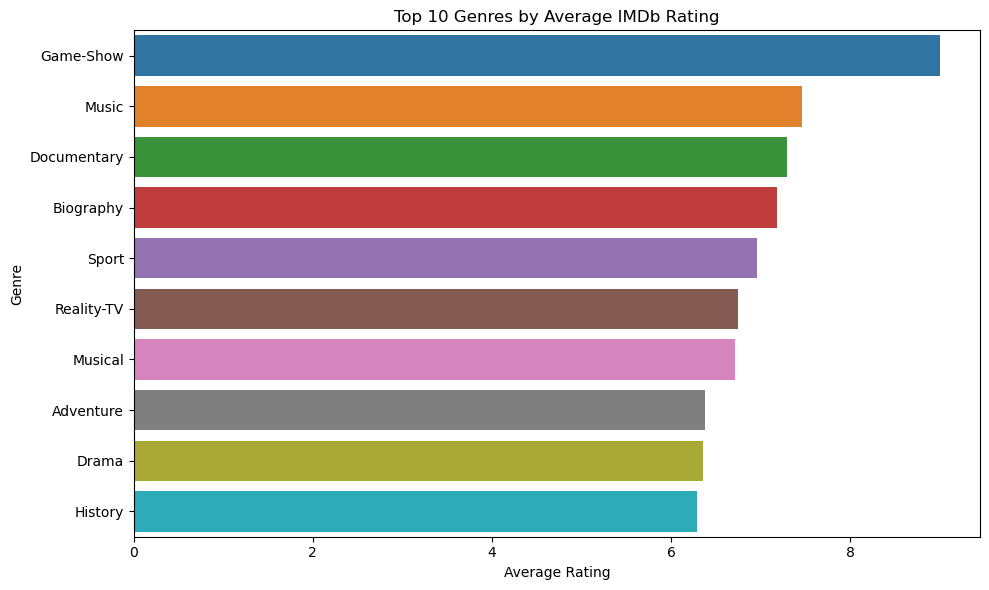

In [ ]:

# Group by genre and calculate average rating
genre_ratings = tmdb_clean.groupby("primary_genre")["averagerating"].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index)
plt.title("Top 10 Genres by Average IMDb Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


The highest rated genre is Game Show, followed by Music, Documentary, and Biography. 
These genres may likely be favored for their entertainment value, emotional impact, and real life relevance.
In contrast, History, Drama, and Adventure received lower average ratings possibly due to slower pacing or predictable storylines.
This shows that people enjoy movies that feel real, emotional, or entertaining more than serious story heavy films


# ROI Top Performers

                      title   studio  domestic_gross_x  foreign_gross  year  \
827             The Gallows  WB (NL)        22,800,000     20,200,000  2015   
396        The Devil Inside     Par.        53,300,000     48,500,000  2012   
239               Insidious       FD        54,000,000     43,000,000  2011   
809              Unfriended     Uni.        32,500,000     31,600,000  2015   
31    Paranormal Activity 2     Par.        84,800,000     92,800,000  2010   
1047                  Split     Uni.       138,300,000    140,200,000  2017   
1049                Get Out     Uni.       176,000,000     79,400,000  2017   
208   Paranormal Activity 3     Par.       104,000,000    103,000,000  2011   
645               Annabelle  WB (NL)        84,300,000    172,800,000  2014   
67        The Last Exorcism      LGF        41,000,000     26,700,000  2010   

      worldwide_gross_x  id release_date                  movie  \
827          43,000,000  80   2015-07-10            The Gallows

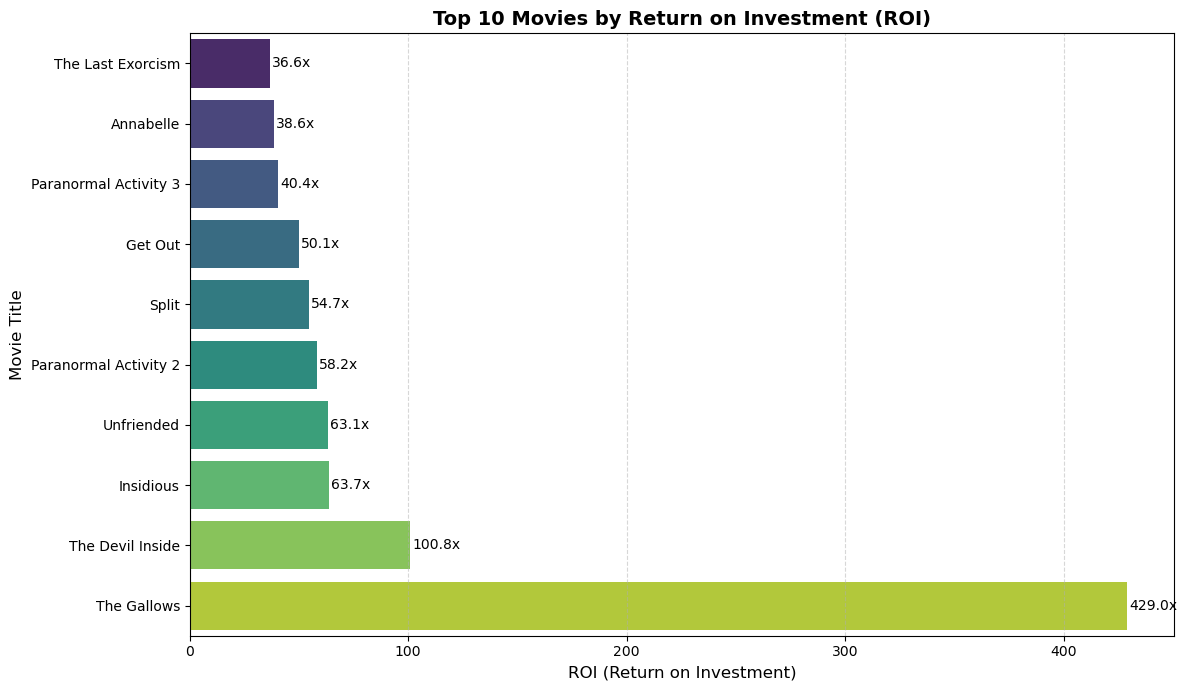

In [ ]:
roi_top = merged_budget.sort_values(by='roi', ascending=False).head(10)
print(roi_top)

# ROI Bar Chart Only (Clean God Mode Style)

# Sort by ROI for better readability in horizontal bar chart
roi_top_sorted = roi_top.sort_values(by="roi", ascending=True)

plt.figure(figsize=(12, 7))
sns.barplot(data=roi_top_sorted, y="title", x="roi", palette="viridis")

# Title and labels
plt.title("Top 10 Movies by Return on Investment (ROI)", fontsize=14, weight='bold')
plt.xlabel("ROI (Return on Investment)", fontsize=12)
plt.ylabel("Movie Title", fontsize=12)

# Add ROI annotations
for i, roi in enumerate(roi_top_sorted['roi']):
    plt.text(roi + 1, i, f"{roi:.1f}x", va='center', fontsize=10, color='black')

plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Key Business Takeaways

1. Microbudget Horror Dominates ROI
Low-cost horror/thriller films consistently top ROI charts. Audiences love suspense; production requires less.

2. High ROI ≠ Big Studio
Many of these films were independent or distributed by mid-tier studios, showing room for disruption.

3. Genre + Budget Match Matters
No $150M blockbusters in the list — these were strategic small bets with high payoffs.

### Runtime vs. Rating Scatter ploy

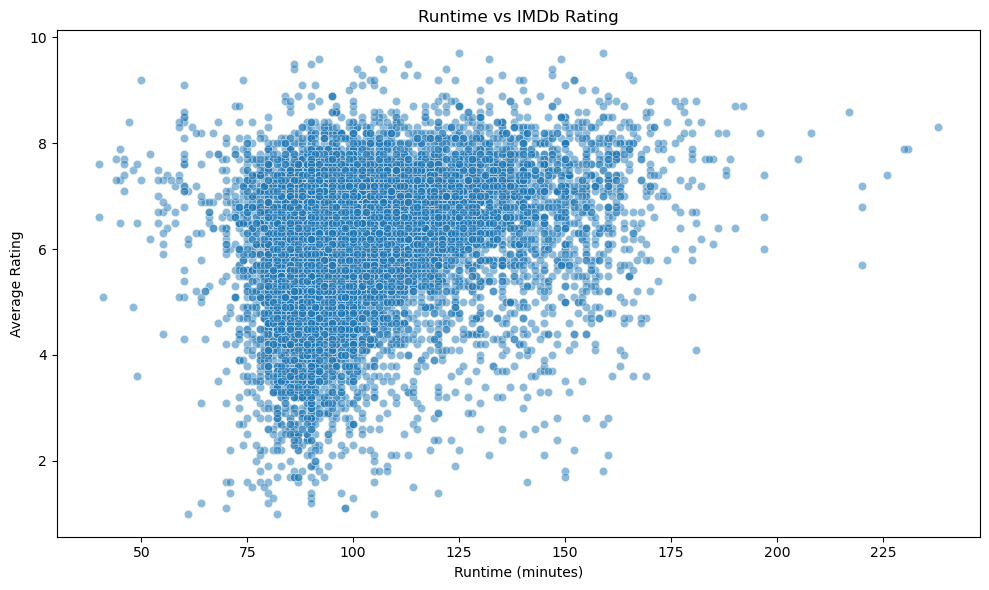

In [ ]:
# Filter to remove outliers
filtered = tmdb_clean[(tmdb_clean["runtime_minutes"] < 240) & (tmdb_clean["numvotes"] > 500)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered, x="runtime_minutes", y="averagerating", alpha=0.5)
plt.title("Runtime vs IMDb Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


Most movies are between 80 to 125minutes long. 
The highest concentration of highly rated movies (7–9 rating) also fall within this runtime range.
There's no strong trend showing that longer movies are rated higher but Very short movies (under 70 min) tend to get lower ratings.
Extremely long movies (over 150 min) are rare and don’t consistently score higher.
Therefore, movies with runtimes between 80–125 minutes tend to be popular and well-rated.
Going too short may risk being seen as underdeveloped, while going too long doesn’t guarantee higher ratings.



### Average Ratings by year

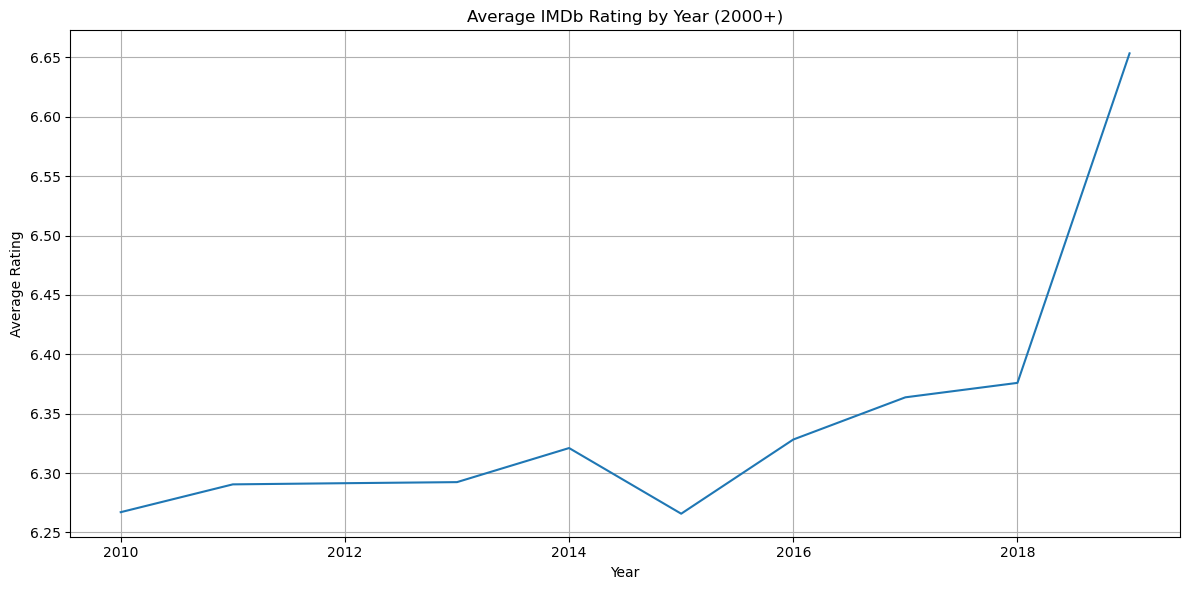

In [ ]:
# Drop null years and filter recent years only
yearly_ratings = tmdb_clean.dropna(subset=["start_year"])
recent = yearly_ratings[yearly_ratings["start_year"].astype(int) >= 2000]

# Group and plot
avg_by_year = recent.groupby("start_year")["averagerating"].mean()

plt.figure(figsize=(12, 6))
avg_by_year.plot()
plt.title("Average IMDb Rating by Year (2000+)")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


Between 2010 and 2018, average ratings stayed relatively stable, ranging between 6.25 and 6.40
From around 2016, there was a slow rise in ratings and then a sharp spike in 2019. This sharp spike may suggest either improved audience satisfaction or fewer poorly rated films that year. 

#### 2.2: ***Revenue Insights***
Using merged dataset( IMBD and Box office mojo data) to show genre vs revenue, rating vs revenue, runtime vs revenue

### Top 10 movies by worlwide revenue



In [ ]:
bom[["title", "worldwide_gross"]].sort_values(by="worldwide_gross", ascending=False).head(10)


,title,worldwide_gross
727,Marvel's The Avengers,"1,518,900,000"
1875,Avengers: Age of Ultron,"1,405,400,000"
3080,Black Panther,"1,347,000,000"
328,Harry Potter and the Deathly Hallows Part 2,"1,341,500,000"
2758,Star Wars: The Last Jedi,"1,332,600,000"
3081,Jurassic World: Fallen Kingdom,"1,309,500,000"
1127,Frozen,"1,276,400,000"
2759,Beauty and the Beast (2017),"1,263,500,000"
3082,Incredibles 2,"1,242,800,000"
1128,Iron Man 3,"1,214,800,000"


Marvel, Harry Potter, Star Wars and Jurassic World films brought in the most revenue globally.
They are  all franchise based, visually spectacular, and come from powerhouse studios like  Disney, Marvel and Warner Bros.
This means that Big franchises with strong brand recognition and global fanbases dominate box office earnings.


### Total Revenue by Year

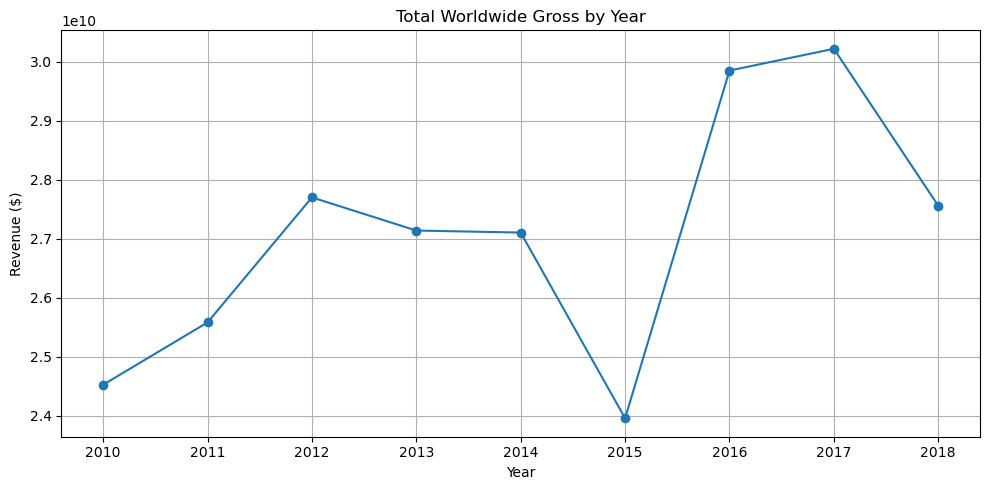

In [ ]:
revenue_by_year = bom.groupby("year")["worldwide_gross"].sum().reset_index()

# Plot
plt.figure(figsize=(10,5))
plt.plot(revenue_by_year["year"], revenue_by_year["worldwide_gross"], marker='o')
plt.title("Total Worldwide Gross by Year")
plt.xlabel("Year")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


There was a steady growth in global revenue from 2010 to 2012 and a sharp decline in 2015 (possibly due to fewer big hit releases).
A Sharp increase in 2016 to 2017 was also witnessed, with peak earnings in 2017 and slight drop in 2018.
This changes show that Movie releases are sensitive to timing, major releases, and global events.
Years with multiple big hit releases (e.g, 2016 to 2017) perform significantly better.

### Top Studios by Total Gross

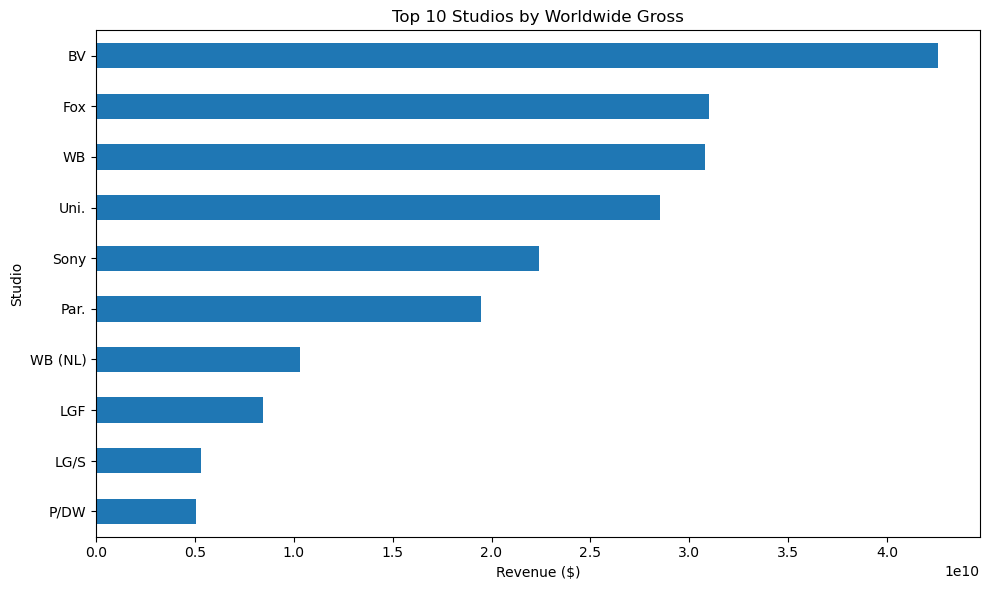

In [ ]:
top_studios = bom.groupby("studio")["worldwide_gross"].sum().sort_values(ascending=False).head(10)

top_studios.plot(kind="barh", figsize=(10,6))
plt.title("Top 10 Studios by Worldwide Gross")
plt.xlabel("Revenue ($)")
plt.ylabel("Studio")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Powerhouse studios like BV (Buena Vista/Disney), Fox, and WB (Warner Bros) dominate in revenue. These studios consistently produce high grossing films which indicates strong distribution networks, popular franchises, and large audiences

## Linear Regression & Time Series Analysis

### Data Preparation for analysis
This section outlines the data preparation steps applied to prepare the movie datasets for analysis. The process involved standardizing movie titles to enable accurate merging of budget and revenue data, extracting release month information, and converting currency fields into numeric format. Additionally, rows with missing values in key columns such as production budget, release month, and studio were removed to ensure the integrity of the dataset.

In [ ]:
merged_df = pd.merge(budget_df, bom, on='title_clean', how='inner', suffixes=('_budgets', '_gross'))
merged_df

,id,release_date,movie,production_budget,domestic_gross_budgets,worldwide_gross_budgets,release_year,roi,title_clean,title,studio,domestic_gross_gross,foreign_gross,year,worldwide_gross_gross
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875",2011,2,pirates of the caribbean on stranger tides,Pirates of the Caribbean: On Stranger Tides,BV,"241,100,000","804,600,000",2011,"1,045,700,000"
1,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963",2015,3,avengers age of ultron,Avengers: Age of Ultron,BV,"459,000,000","946,400,000",2015,"1,405,400,000"
2,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,6,avengers infinity war,Avengers: Infinity War,BV,"678,800,000",NaN,2018,NaN
3,9,2017-11-17,Justice League,"300,000,000","229,024,295","655,945,209",2017,1,justice league,Justice League,WB,"229,000,000","428,900,000",2017,"657,900,000"
4,10,2015-11-06,Spectre,"300,000,000","200,074,175","879,620,923",2015,2,spectre,Spectre,Sony,"200,100,000","680,600,000",2015,"880,700,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,68,2012-04-27,Sound of My Voice,"135,000","408,015","429,448",2012,2,sound of my voice,Sound of My Voice,FoxS,"408,000",NaN,2012,NaN
1330,73,2012-06-15,Your Sister's Sister,"120,000","1,597,486","3,090,593",2012,25,your sisters sister,Your Sister's Sister,IFC,"1,600,000",NaN,2012,NaN
1331,80,2015-07-10,The Gallows,"100,000","22,764,410","41,656,474",2015,416,the gallows,The Gallows,WB (NL),"22,800,000","20,200,000",2015,"43,000,000"
1332,86,2017-07-07,A Ghost Story,"100,000","1,594,798","2,769,782",2017,27,a ghost story,A Ghost Story,A24,"1,600,000",NaN,2017,NaN


In [ ]:
# Clean and standardize movie titles
for df in [budget_df, bom, movie_basics]:
    if 'title' in df.columns:
        df['title_clean'] = df['title'].str.lower().str.replace(r'[^a-z0-9 ]', '', regex=True).str.strip()
    elif 'movie' in df.columns:
        df['title_clean'] = df['movie'].str.lower().str.replace(r'[^a-z0-9 ]', '', regex=True).str.strip()
    else:
        print("DataFrame missing 'title' and 'movie' columns; skipping title_clean creation.")

# Now merge after titles are cleaned
merged_df = pd.merge(budget_df, bom, on='title_clean', how='inner', suffixes=('_budgets', '_gross'))

# Then clean revenue columns
merged_df[['domestic_gross_budgets', 'worldwide_gross_budgets']] = merged_df[
    ['domestic_gross_budgets', 'worldwide_gross_budgets']
].replace([np.inf, -np.inf], np.nan)

merged_df.dropna(subset=['domestic_gross_budgets', 'worldwide_gross_budgets'], inplace=True)

# Extract release month
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')
merged_df['release_month'] = merged_df['release_date'].dt.month

# Convert currency columns
for col in ['production_budget', 'domestic_gross_budgets', 'worldwide_gross_budgets']:
    merged_df[col] = merged_df[col].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with missing values in critical columns
merged_df = merged_df.dropna(subset=['production_budget', 'release_month', 'studio', 'domestic_gross_budgets', 'worldwide_gross_budgets'])

DataFrame missing 'title' and 'movie' columns; skipping title_clean creation.


In [ ]:
# Combine all predictors into one DataFrame
model_df = merged_df[['production_budget', 'release_month', 'studio', 'domestic_gross_budgets', 'worldwide_gross_budgets']].copy()

# Ensure correct dtypes
model_df['release_month'] = model_df['release_month'].astype(int)
model_df['production_budget'] = model_df['production_budget'].astype(float)
model_df['studio'] = model_df['studio'].astype(str)

# Create dummy variables
df_encoded = pd.get_dummies(model_df[['production_budget', 'release_month', 'studio']], drop_first=True)

## Time Series Analysis

The time series analysis below reveals how **domestic and worldwide gross revenues have evolved annually**. Both revenue streams generally follow similar trends, with noticeable peaks and troughs that likely correspond to blockbuster releases or industry-wide shifts.

- **Domestic revenue** shows steady performance with occasional surges, suggesting a mature but relatively stable market.
- **Worldwide revenue** demonstrates higher volatility and growth potential, reinforcing the importance of international appeal and distribution.

These patterns suggest that while the domestic market offers consistency, **future growth and profitability are increasingly tied to worldwide performance**, and studios should plan with a global audience in mind.

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

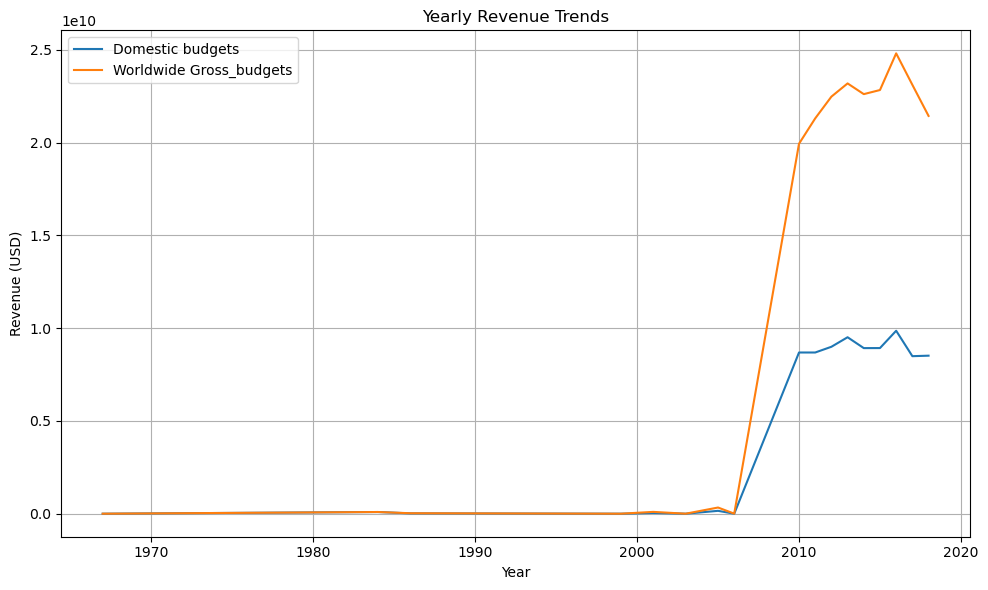

In [ ]:
# Ensure 'release_year' exists
merged_df['release_year'] = merged_df['release_date'].dt.year

# Replace inf values and drop missing ones
merged_df[['domestic_gross_budgets', 'worldwide_gross_budgets']] = merged_df[
    ['domestic_gross_budgets', 'worldwide_gross_budgets']
].replace([np.inf, -np.inf], np.nan)
merged_df.dropna(subset=['domestic_gross_budgets', 'worldwide_gross_budgets', 'release_year'], inplace=True)

# Group by year and plot
yearly_revenue = merged_df.groupby('release_year')[['domestic_gross_budgets', 'worldwide_gross_budgets']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_revenue, x='release_year', y='domestic_gross_budgets', label='Domestic budgets')
sns.lineplot(data=yearly_revenue, x='release_year', y='worldwide_gross_budgets', label='Worldwide Gross_budgets')
plt.title("Yearly Revenue Trends")
plt.xlabel("Year")
plt.ylabel("Revenue (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Linear Regression Analysis

### Domestic Gross Model
The regression model below analyzes how production budget, release month, and studio affiliation contribute to domestic box office revenue.

- The **R-squared value of 0.529** indicates the model explains roughly **53% of the variance** in domestic gross revenue.
- **Production budget** has a strong positive and statistically significant impact on domestic earnings (p < 0.001).
- Most other predictors, including studios and release month, show **low significance**, suggesting limited explanatory power on their own.
- The adjusted R-squared (0.488) also points to **possible overfitting or multicollinearity** among variables.

Overall, **budget allocation** appears to be the most critical factor in predicting domestic success.

**Mathematical model**:

Domestic Gross=m1*Budget + m2 * Release month + m3 * Studio .......... + c

**Where:**

        m = coefficients (from the model)
        
        c = intercept

In [234]:
# Prepare the data for regression analysis
# Ensure all columns are numeric and/or categorical
X_domestic = sm.add_constant(df_encoded.astype(float))
y_domestic = model_df['domestic_gross_budgets'].astype(float)

model_domestic = sm.OLS(y_domestic, X_domestic).fit()
print(model_domestic.summary())  

                              OLS Regression Results                              
Dep. Variable:     domestic_gross_budgets   R-squared:                       0.529
Model:                                OLS   Adj. R-squared:                  0.490
Method:                     Least Squares   F-statistic:                     13.53
Date:                    Tue, 10 Jun 2025   Prob (F-statistic):          1.10e-139
Time:                            12:51:31   Log-Likelihood:                -25715.
No. Observations:                    1333   AIC:                         5.164e+04
Df Residuals:                        1230   BIC:                         5.217e+04
Df Model:                             102                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

## Worldwide Gross Revenue Model
The regression model below estimates how production budget, release month, and studio affiliation affect a movie’s worldwide box office revenue.

- The **R-squared value of 0.627** indicates that approximately **63% of the variance in worldwide gross** can be explained by the model's variables.
- The **production budget** is the most statistically significant predictor (*p < 0.001*), suggesting that higher investments are strongly associated with greater global returns.
- Other variables, such as **release month** and **studio**, did not show statistically significant effects in this model, potentially due to multicollinearity or lack of strong correlation.
- The high condition number flags possible multicollinearity, especially among studio dummy variables, which can distort coefficient estimates.

In brief, the model confirms the crucial role of production investment while highlighting the need for refined data or additional variables

**Mathematical model**:

Domestic Gross=m1*Budget + m2 * Release month + m3 * Studio .......... + c

**Where:**

        m = coefficients (from the model)
        
        c = intercept

In [238]:
#model for worldwide gross

X_worldwide = sm.add_constant(df_encoded.astype(float))
y_worldwide = model_df['worldwide_gross_budgets'].astype(float)

model_worldwide = sm.OLS(y_worldwide, X_worldwide).fit()
print(model_worldwide.summary())

                               OLS Regression Results                              
Dep. Variable:     worldwide_gross_budgets   R-squared:                       0.627
Model:                                 OLS   Adj. R-squared:                  0.596
Method:                      Least Squares   F-statistic:                     20.30
Date:                     Tue, 10 Jun 2025   Prob (F-statistic):          1.33e-198
Time:                             12:56:47   Log-Likelihood:                -26912.
No. Observations:                     1333   AIC:                         5.403e+04
Df Residuals:                         1230   BIC:                         5.456e+04
Df Model:                              102                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

## Visualization

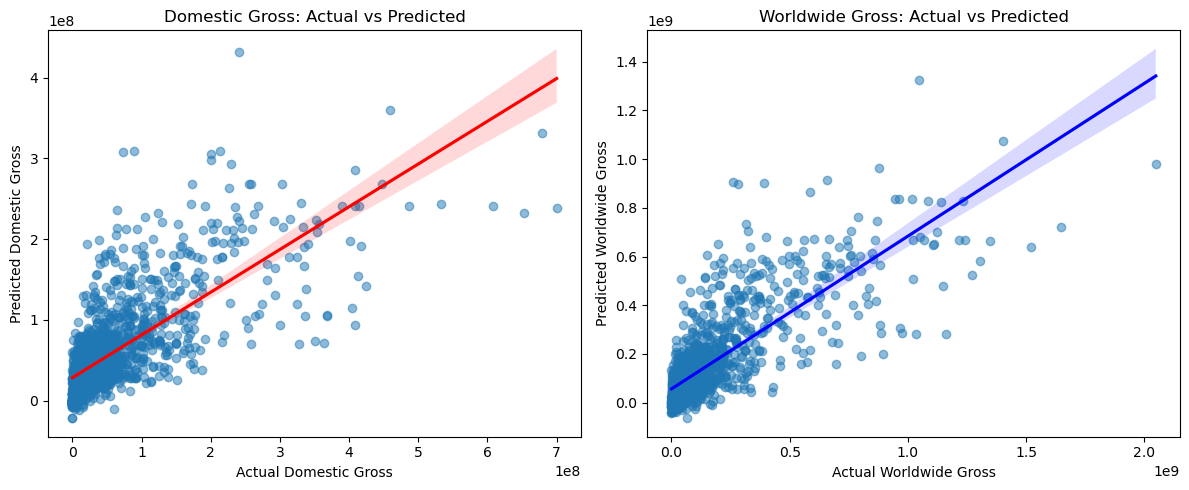

In [ ]:
# Fitted values vs actuals
plt.figure(figsize=(12, 5))

# Domestic Gross
plt.subplot(1, 2, 1)
sns.regplot(x=y_domestic, y=model_domestic.fittedvalues, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Actual Domestic Gross")
plt.ylabel("Predicted Domestic Gross")
plt.title("Domestic Gross: Actual vs Predicted")

# Worldwide Gross
plt.subplot(1, 2, 2)
sns.regplot(x=y_worldwide, y=model_worldwide.fittedvalues, scatter_kws={"alpha": 0.5}, line_kws={"color": "blue"})
plt.xlabel("Actual Worldwide Gross")
plt.ylabel("Predicted Worldwide Gross")
plt.title("Worldwide Gross: Actual vs Predicted")

plt.tight_layout()
plt.show()# Fitted values vs actuals



### Interpretation of the Visualizations

**Domestic Gross**:
- Most data points cluster near the red line (perfect prediction), indicating decent model fit.
- Outliers suggest variability due to unmodeled factors (e.g., star power, marketing).

**Worldwide Gross**:
- Predictions are more dispersed, indicating less accuracy.
- International performance likely depends on additional market-specific variables.

### Recommendations for the Studio to be set up

1. **Invest in Moderate-to-High Budgets**:
   - Higher budgets generally yield higher returns.
   - Avoid underspending unless the genre favors low-cost production (e.g., horror).

### Return On Investment - ROI
- To achieve maximum capital efficiency, our studio should launch a slate of 3–5 microbudget horror/thriller films annually, targeting $1M budgets and optimizing for ROI.

2. **Optimize Release Timing**:
   - Target popular months (summer and holidays) for major releases.


4. **Supplement Global Strategy with External Insights**:
   - Use global marketing data, localization, and regional audience preferences.

5. **Use Domestic Market as a Testing Ground**:
   - Pilot films domestically before scaling internationally.

6. **Invest in Reality-Based and Musical Genres**
Based on IMDb ratings, Game Shows, Music, Documentaries, and Biographies are the highest-rated genres.
Focus on producing films in these categories to align with current viewer preferences and build credibility.

7. **Aim for a Runtime Between 80–125 Minutes**
Most highly rated films fall within the 80 to 125 minute range, and very short or very long films receive lower ratings.
Targeting this runtime range will balance viewer engagement and satisfaction.
8. **Release Films in Peak Earning Periods & Learn from Top Studios**
The highest movie earnings happened in 2016 and 2017, and studios like Disney (BV) and Warner Bros (WB) made the most money overall. 
Focus on planning movie releases during strong earning years and studying what the top studios did right, like the type of movies they made and when they released them.